In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, os.path
from skimage import io

import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [2]:
#Path set up
root_path = "c:/data/chest_xray/"

train_data_path = root_path + "train/"
test_data_path = root_path + "test/"

train_normal_path = train_data_path + "NORMAL/"
train_pneumonia_path = train_data_path + "PNEUMONIA/"

test_normal_path = test_data_path + "NORMAL/"
test_pneumonia_path = test_data_path + "PNEUMONIA/"

In [3]:
train_normal_dir = os.listdir(train_normal_path)
train_pneumonia_dir = os.listdir(train_pneumonia_path)

test_normal_dir = os.listdir(test_normal_path)
test_pneumonia_dir = os.listdir(test_pneumonia_path)

print("Number of normal x-rays (train): ", len(train_normal_dir))
print("Number of pneumonia x-rays (train): ", len(train_pneumonia_dir))

print("Number of normal x-rays (test): ", len(test_normal_dir))
print("Number of pneumonia x-rays (test): ", len(test_pneumonia_dir))

Number of normal x-rays (train):  1341
Number of pneumonia x-rays (train):  3875
Number of normal x-rays (test):  234
Number of pneumonia x-rays (test):  390


In [4]:
def plot_images(item_dir, top=10):
  dir = os.listdir(item_dir)
  all_files = [os.path.join(item_dir, file) for file in dir]
  top_files = np.random.choice(all_files, top)

  plt.figure(figsize = (15,15))
  for idx, img_path in enumerate(top_files):
    plt.subplot(5,5, idx+1)
    img = io.imread(img_path, as_gray=False)
    plt.imshow(img, cmap=plt.get_cmap('gray'))
  plt.tight_layout()

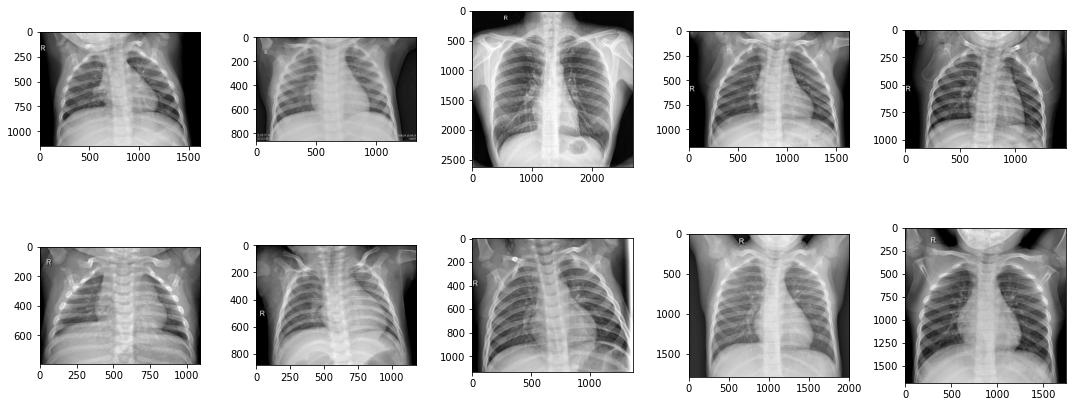

In [5]:
plot_images(train_normal_path)

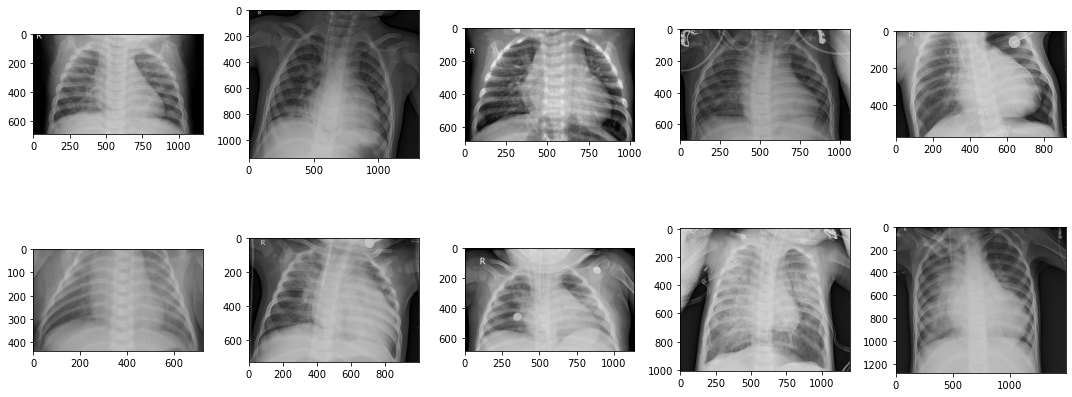

In [6]:
plot_images(train_pneumonia_path)

In [7]:
hight = 224
width = 224
channels = 1
batch_size = 1
num_classes = 2
num_epochs = 1
learning_rate = 0.0001
input_shape = (hight, width, channels)

In [8]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# 64 3x3 kernels
model.add(Conv2D(32, (3, 3), activation='relu'))
# Reduce by taking the max of each 2x2 block
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout to avoid overfitting
model.add(Dropout(0.25))
# Flatten the results to one dimension for passing into our final layer
model.add(Flatten())
# A hidden layer to learn with
model.add(Dense(128, activation='relu'))
# Another dropout
model.add(Dropout(0.5))
# Final categorization from 0-9 with softmax
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 32)      4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 387200)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               49561728  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
train_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(
    directory=train_data_path,
    target_size=(hight, width),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="binary",
    shuffle=True,
    seed=42
)

test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
    directory=train_data_path,
    target_size=(hight, width),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="binary",
    shuffle=True,
    seed=42
)

Found 5216 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(generator = train_generator, 
                            steps_per_epoch = learning_rate)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 0.0001 steps
